```---
title: Gridsearch
duration: "1:25+"
creator:
    name: David Yerrington
    city: SF
---```

<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
# GridSearch
Week 3 | Lesson 4.3
***


![](https://snag.gy/aYcCt2.jpg)


## Discussion (5 mins)

So far we have learned about linear regression and regularization.  _Given what you know about linear regression and how it's implemented in sklearn:_
<br><br>
## How would you approach tuning your model?
<br><br>

## Recap:  EDA, Analysis Strategy

When doing exploratory analysis and starting to think about model selection, we have a few good starting points.

- **Look at your data through subsetting and summary statistics**
- Looking at coeficient matrices
- Selecting features (variables) to use in our models
- Considering parameters that might work, in a broad sense
- Validation strategy

A correlation matrix is used to investigate the **dependence between multiple variables at the same time**. The result is a table containing the correlation coefficients between each variable and the others. This is ideal for feature selection when deciding which features to use in a predictive model.

## Anyone use Gridsearch before?

How / what / why?

## Intro to Gridsearch (10 mins)

What is "gridsearch"? **Gridsearch** is the process of searching for the optimal set of tuning parameters for a model. **Gridsearch** is a scikit-learn method.  We use **Gridsearch** for searching across values of parameters, in combination with models, also using cross-validation to evaluate the effect to find the **best model**. It's called gridsearch because the idea is that there is a "grid" of parameters that are iteratively searched.

## An Example

So far we haven't really done much with tuning linear regression, other than regularization.  The prime example we will look at will be regularization, but let's first look at the mechanics of our model to establish some basic assumptions.

### Linear Regression Parameters
| Parameter | Potential Values |
| --- | ---|
| **fit_intercept** | bool: True/False |
| **normalize** | bool:  True/False |

> The normalize parameter:  If **True**, the regressors X will be normalized before  regression (they are talking about doing _standardization_ actually).


This is as if we where to run, and score the following code, using all combinations of the specified parameters:

```python

# Case 1
lm = LinearRegression(fit_itercept=True, normalize=False)
model = lm.fit(X, y)
score = model.score(X,y)

# Case 2
lm = LinearRegression(fit_itercept=False, normalize=False)
model = lm.fit(X, y)
score = model.score(X,y)

# Case 3
lm = LinearRegression(fit_itercept=True, normalize=True)
model = lm.fit(X, y)
score = model.score(X,y)

# Case 4
lm = LinearRegression(fit_itercept=False, normalize=False)
model = lm.fit(X, y)
score = model.score(X,y)

```

## A More Sophisticated Example

We haven't yet learned the intuition behind K-Nearest Neighbors, it's going to be introduced next week. So try to curb your curiousity for a moment about how this model works, and let's just talk about workflow and the programming mechanics for this example.

Since **Gridsearch** is a method with a broad range of utility beyond regression problems, it's great for testing a combination of parameters on models that offer a broader range of **hyperparamters**.

> Lingo guide:  **hyperparameter** is used interchangably with **parameter**, which is used with a given model. We are referring to the parameters we pass to our models to control their behavior.

| Parameter | Potential Values |
| --- | ---|
| **n_neighbors** | int range 1-150 |
| **weights** | strs:  "uniform", "distance" or user defined function |
| **algorithm** | strs: "ball_tree", "kd_tree", "brute", "auto" |
| **leaf_size** | int range 0-150 |
| **metric** | str: "minkowski" or DistanceObject type |
| **p** | int: 1=manhattan_distance, 2= euclidean_distance |

### What is GridSearch doing?

```python
from sklearn import neighbors

# Search - 1
neighbors.KNeighborsClassifier(
    n_neighbors   =  1, 
    weights       =  "uniform", 
    algorithm     =  "ball_tree", 
    leaf_size     =  30, 
    etc...
)
# Search - 2
neighbors.KNeighborsClassifier(
    n_neighbors   =  2, 
    weights       =  "uniform", 
    algorithm     =  "ball_tree", 
    leaf_size     =  30, 
    etc...
)
# Search - 3
neighbors.KNeighborsClassifier(
    n_neighbors   =  3, 
    weights       =  "uniform", 
    algorithm     =  "ball_tree", 
    leaf_size     =  30, 
    etc...
)

...
... ** chunk chunk chunk -- [searching intensifies] -- hours later **
...

# Searching combinations of 300,000+
neighbors.KNeighborsClassifier(
    n_neighbors   =  150, 
    weights       =  "distance", 
    algorithm     =  "auto", 
    leaf_size     =  150, 
    etc...
)

```

## How many models will be built and tested on a KNN model with the following parameters? (5 mins)

- **n_neighbors**:  1-25
- **algorithm**: "ball_tree", "kd_tree", "brute", "auto"

## Models Have Parameters

Every model we will be learning have a predefined set of parameters.  If it has parameters, we can test a variety of parameters using gridsearch, to see the performance of various sets of parameters to get a sense of how they work in relation to our dataset and model.


<br><br><br>
## Do you remember which parameter CV was used for?
<Br><Br><br><br>

## Implementing GridsearchCV

By default the `cv` parameter is `3`.  You can set this as high as you want!  Keep in mind how it works and why it's used.  If this is a mystery, please review our material on K-Folds validation.

In [2]:
# Load gridsearch, libraries, test data
from sklearn import grid_search, datasets
from sklearn.linear_model import LinearRegression
import pandas as pd, patsy

columns =  "age sex bmi map tc ldl hdl tch ltg glu".split()

data    =  datasets.load_diabetes()
df      =  pd.DataFrame(data.data, columns=columns)
df['target'] = data.target

# Setup patsy design matrix
y, X    =  patsy.dmatrices("target ~ age + sex + bmi + map + tc + ldl + glu", data=df, return_type="dataframe")

### Setup GridSearchCV Parameters

In [6]:
# Setup our GridSearch Parmaters
search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

# Intialize a blank model object
lm = LinearRegression()

# Initialize gridsearch
estimator = grid_search.GridSearchCV(lm, search_parameters, cv=5)

# Fit some data!
results = estimator.fit(X, y)

### Review Results

There are a number of interesting result properties to explore.

| Property | Use |
| --- | ---|
| **`results.param_grid`** | Displays parameters used |
| **`results.best_score_`** | Best score achieved |
| **`results.best_estimator_`** | Reference to model with best score.  Is usable / callable. |
| **`results.best_params_`** | The parameters that have been found to perform with the best score. |
| **`results.grid_scores_`** | Display score attributes with cooresponding parameters | 

In [7]:
print "Best Score:"
print results.best_score_

print "Best Estimator:"
print results.best_estimator_

print "Best Params:"
print results.best_params_


Best Score:
0.370689510527
Best Estimator:
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
Best Params:
{'normalize': False, 'fit_intercept': False}


### Find All Tested Params with Scores
_In the case of linear regression, the R2 isn't displayed, which is annoying.  You should at least know how where to look for the future use cases when you use other models_.

It's not applicable now, but this is a great place to get data to plot your parameter values and their impact on your score as they change.  We will explore this possibility in the future.

In [46]:
results.grid_scores_

[mean: 0.37069, std: 0.07662, params: {'normalize': False, 'fit_intercept': True},
 mean: 0.37069, std: 0.07662, params: {'normalize': True, 'fit_intercept': True},
 mean: 0.37069, std: 0.07662, params: {'normalize': False, 'fit_intercept': False},
 mean: 0.37069, std: 0.07662, params: {'normalize': True, 'fit_intercept': False}]

<br><br><br>

## (5 mins) How do you think we can use gridsearch to avoid overfitting?
<br><br><br>

# (20 mins)  Idependent Practice

Setup a basic gridsearch with all potential parameters for **fit_intercept**, and **normalize** parameters for linear regression using the boston housing dataset.

1. Select a set of predictors
1. Use the provided target as your response
1. Setup and perform a basic gridsearch on a blank linear model object
1. Print our your results

> _The actual results won't be that interesting but the important thing is that you understand the implementation._

In [19]:
data = datasets.load_boston()
data.keys()

X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target
X.head()

search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

lm = LinearRegression()

# Initialize gridsearch
estimator = grid_search.GridSearchCV(lm, search_parameters, cv=5)

# Fit some data!
results = estimator.fit(X, y)

print "Best estimator:",results.best_estimator_
print "Best score:",results.best_score_
print "Best parameter:",results.best_params_
vars(results)

Best estimator: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)
Best score: 0.408547740845
Best parameter: {'normalize': False, 'fit_intercept': False}


{'best_estimator_': LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False),
 'best_params_': {'fit_intercept': False, 'normalize': False},
 'best_score_': 0.40854774084548268,
 'cv': 5,
 'error_score': 'raise',
 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'fit_params': {},
 'grid_scores_': [mean: 0.35131, std: 0.37971, params: {'normalize': False, 'fit_intercept': True},
  mean: 0.35131, std: 0.37971, params: {'normalize': True, 'fit_intercept': True},
  mean: 0.40855, std: 0.40800, params: {'normalize': False, 'fit_intercept': False},
  mean: 0.40855, std: 0.40800, params: {'normalize': True, 'fit_intercept': False}],
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'fit_intercept': [True, False], 'normalize': [False, True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'scorer_': <function sklearn.metrics.scorer._passthrough_scorer>,
 'scoring': None,
 'verbose': 0}

<br><Br>

# (5 mins)  What are some disadvantages to GridSearch that you can think of?

<br><Br>

# Summary Check-in

- What is the most difficult thing to understand about GridSearch?
- How many parameters can be searched?
- How do we know if our best score is good or not?
- Which models can we use with Gridsearch?

---

## (60 mins) Independent/Group Practice

Feel free to partner up or work within your group.  Use gridsearch to setup a basic pipeline on to search for `alpha` parameters for Lasso regularized regression.

1.  Load up the winedataset used from our regularization lab yesterday.
1.  Import Lasso, patsy
1.  Use patsy to setup a design matrix
1.  Setup a range of alphas to test _(hint: numpy generator)_
1.  Setup gridsearch parameters with your range of alphas
1.  Initialize and gridsearch
1.  Review / print performance metrics and decide on an optimal parameter for alpha

Remember:  _Alphas for the Lasso tend to effect regularization linearly rather than by orders of magnitude like in the ridge. A linear series of alphas is sufficient. Don't worry about the warning for Lasso at alpha 0._

In [62]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

wind_fp = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/wine_quality/winequality_merged.csv'
df = pd.read_csv(wind_fp)

#Cleaning up column names so can use patsy formula on them
df.columns =  [c.replace(" ","_") for c in df.columns]
x_col = ' + '.join(df.columns[:-2])
print x_col

fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol


In [99]:
#Using Patsy to set up X and Y matrix
formula = "red_wine ~ volatile_acidity + fixed_acidity + chlorides + total_sulfur_dioxide + sulphates"
formula = "quality ~ "+x_col
y, X = patsy.dmatrices(formula, df, return_type='dataframe')

#Initiliaze Lasso Model which will be used in grid search and setting up range of alphas to test
alpha_range = np.linspace(0.01,1,100)
lasso_m = Lasso()

search_parameters = {
    'alpha': alpha_range, 
    'normalize': [False, True],
    'fit_intercept': [False,True]
}

estimator = grid_search.GridSearchCV(lasso_m,search_parameters,cv=5)
results = estimator.fit(X,y)


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [98]:
print results.best_params_
print results.best_score_

{'normalize': False, 'alpha': 0.01, 'fit_intercept': False}
0.236658450886


> _Don't feel like you need to tackle these in any particular order!  The coef / plotting challenge is actually pretty tricky._

## Bonus Challenge #1
Figure out how to plot the impact of your score given the range of parameters used.

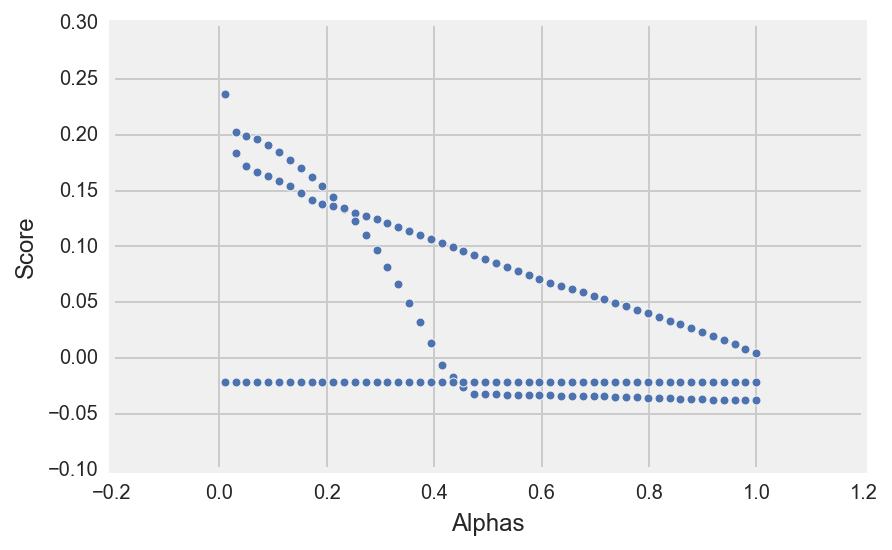

In [96]:
my_alphas = []
my_score = []
for x in results.grid_scores_:
    y = tuple(x)
    my_score.append(y[1])
    my_alphas.append(y[0]['alpha'])

my_df = pd.DataFrame(data=[my_alphas,my_score])
my_df = my_df.T
my_df.columns=[['Alphas','Score']]

my_df.plot(x= 'Alphas',y = 'Score' ,kind='scatter')

## Bonus Challenge #2

Investigate the effect of coefficients given the range of alphas used, in addition to scores.  You might try to plot a few of these within a range of parameters used.  How can you evaluate this?  There is more than one way.


## Bonus Challenge #3

Attempt the same exercize using ridge and/or elasticnet, adjusting parameters for appropriate range/scale.  Also, attempt scaling.

SyntaxError: invalid syntax (<ipython-input-1-400e6bb162ec>, line 1)

In [ ]:
def recur_day(start=1,day=1,end=1,stop=15):
    end = 2*start
    if day == stop:
        return 
    